Setting up the folders ad Data Preparation

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define root project path
project_root = '/content/drive/My Drive/sectoral_inflation_forecasting'

# Define data paths
simulated_data_path = f"{project_root}/data/simulated/sectoral_inflation_simulated.csv"
processed_data_path = f"{project_root}/data/processed"

# Define output paths
plots_output_path = f"{project_root}/outputs/plots"
reports_output_path = f"{project_root}/outputs/reports"

# Check paths
print("Simulated data path:", simulated_data_path)
print("Reports will be saved to:", reports_output_path)
print("Plots will be saved to:", plots_output_path)


Mounted at /content/drive
Simulated data path: /content/drive/My Drive/sectoral_inflation_forecasting/data/simulated/sectoral_inflation_simulated.csv
Reports will be saved to: /content/drive/My Drive/sectoral_inflation_forecasting/outputs/reports
Plots will be saved to: /content/drive/My Drive/sectoral_inflation_forecasting/outputs/plots


Load & Pivot Data for Forecasting

In [4]:
# Core Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style
sns.set(style="whitegrid")

# Define base paths
base_path = '/content/drive/My Drive/sectoral_inflation_forecasting'

# Data paths
simulated_data_path = os.path.join(base_path, 'data', 'simulated')
processed_data_path = os.path.join(base_path, 'data', 'processed')

# Output paths
plot_output_path = os.path.join(base_path, 'outputs', 'plots')
report_output_path = os.path.join(base_path, 'outputs', 'reports')

# Path to the corrected simulated CSV file
simulated_csv_path = os.path.join(simulated_data_path, 'sectoral_inflation_data.csv')

In [5]:
# Load the saved simulated CSV
df_sim = pd.read_csv(simulated_csv_path)


Data Reshaping (Pivoting) for Visualization

In [6]:
# Pivot to see inflation rates across time per country and sector
pivot_df = df_sim.pivot_table(
    index='Year',
    columns=['Country', 'Sector'],
    values='Inflation_Rate'
)

# Display first few rows
pivot_df.head()


Country   Denmark                                     Germany               \
Sector  Education Energy  Food Healthcare Transport Education Energy  Food   
Year                                                                         
2015         3.67   3.30  2.91       2.02      2.98      2.49   2.85  2.51   
2016         2.58   3.10  2.64       2.25      2.56      2.27   2.76  2.84   
2017         3.33   3.12  2.52       2.82      2.13      2.59   3.11  2.11   
2018         3.63   2.27  2.86       1.80      1.94      2.87   2.53  2.25   
2019         3.13   3.43  3.09       2.53      2.45      3.61   4.04  1.79   

Country                          India                                    
Sector  Healthcare Transport Education Energy  Food Healthcare Transport  
Year                                                                      
2015          5.36      3.42      3.81   2.37  2.57       4.09      3.52  
2016          4.77      3.70      4.05   3.03  3.28       3.01      4.30  
2017          4.52      4.26      3.92   2.42  3.26       3.32      3.97  
2018          5.01      3.27      4.55   2.17  3.63       4.09      3.50  
2019          4.55      3.12      4.78   3.61  2.83       4.36      3.31

Quick Heatmap Visualization of Sectoral Inflation Trends

This gives us a high-level view of sectoral inflation changes over time.

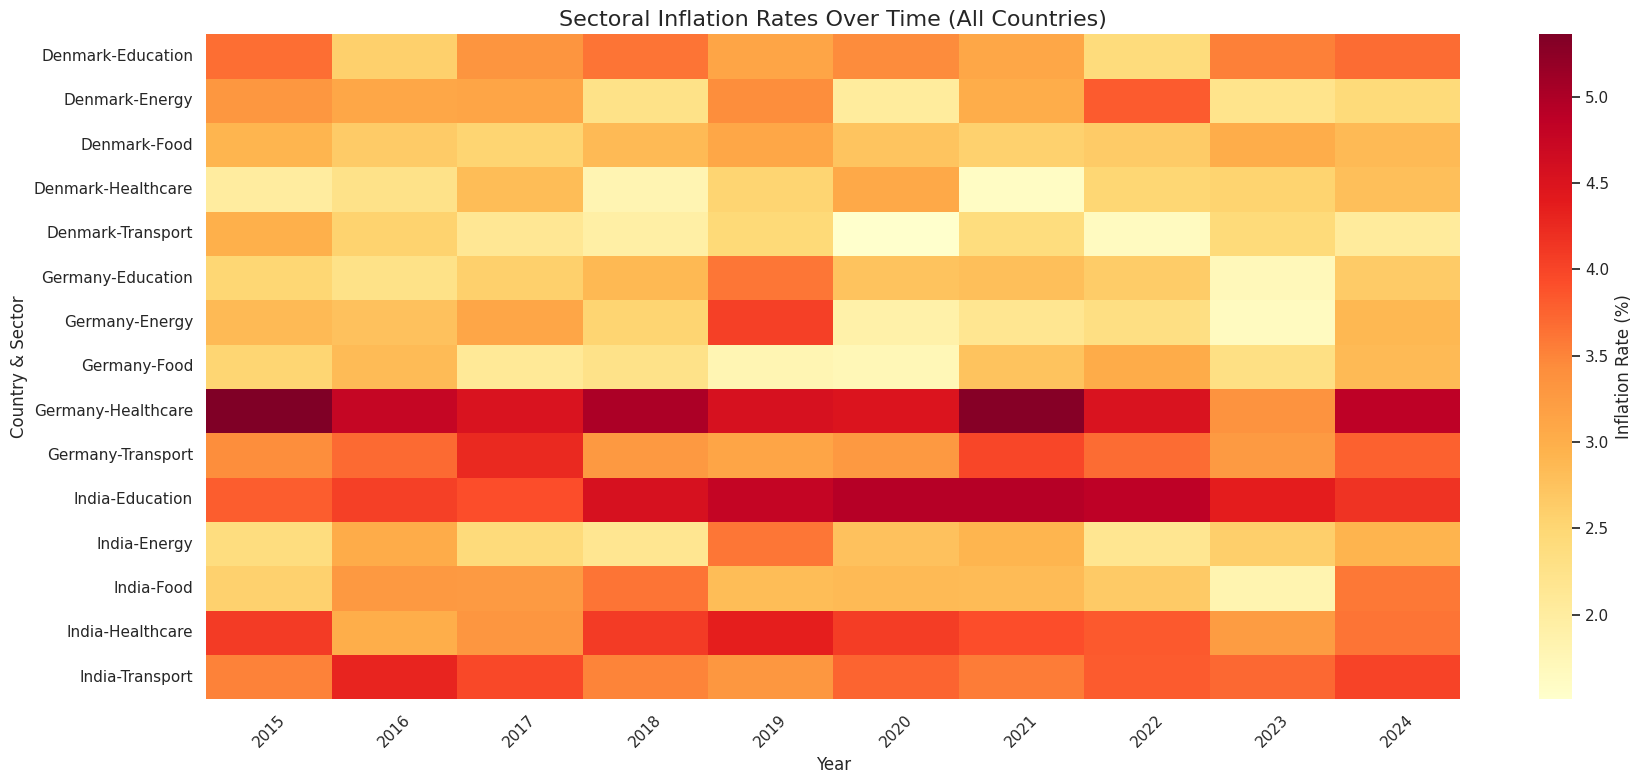

In [7]:
# Set plot size
plt.figure(figsize=(18, 8))

# Create a heatmap
sns.heatmap(pivot_df.T, cmap='YlOrRd', cbar_kws={'label': 'Inflation Rate (%)'})

plt.title('Sectoral Inflation Rates Over Time (All Countries)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Country & Sector')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plot_path = os.path.join(plot_output_path, 'sectoral_inflation_heatmap.png')
plt.savefig(plot_path, dpi=300)
plt.show()


Save Processed Data

In [8]:
# Path for saving processed dataset
processed_data_path = os.path.join('/content/drive/MyDrive/sectoral_inflation_forecasting/data/processed', 'sectoral_inflation_data_processed.csv')

# Save the DataFrame
df_sim.to_csv(processed_data_path, index=False)

print(f"Processed dataset saved to: {processed_data_path}")


Processed dataset saved to: /content/drive/MyDrive/sectoral_inflation_forecasting/data/processed/sectoral_inflation_data_processed.csv
